# Q1

[Distribution Dimensionality](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/dimensionality.html#dimensionality)

![](https://www.pymc.io/projects/docs/en/stable/_images/acfb0536de4db53baddb8a6d632d6efdc65c01eedeee1a90b7b1e1dd45db4c16.svg)


[PyMC and PyTensor](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_pytensor.html#pymc-pytensor)

![](https://raw.githubusercontent.com/pymc-devs/pytensor/main/doc/tutorial/apply.png)



[Using Data Containers](https://www.pymc.io/projects/examples/en/latest/fundamentals/data_container.html)

![](https://www.pymc.io/projects/examples/en/latest/_images/93bd28cbe92a4ebcd2ac5f2701fc0f1d1708da944cd68ec9b96f26b1acef03c0.svg)



[Prior and Posterior Predictive Checks](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/posterior_predictive.html#posterior-predictive)

![](https://www.pymc.io/projects/docs/en/stable/_images/fe93e1963079f236f472726d7e5a22241866b629391de65d433f6f3512ca6f01.png)






# Q2

## 1.

In [1]:
import pymc
import arviz as az

In [2]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
priors_normal_gamma = pymc.Model()
x = stats.norm(loc = 0, scale = 1).rvs(30)

with priors_normal_gamma:
    theta0 = 2
    true_tau = 2
    
    #defining theta prior
    theta_prior_n = 1
    tau0 = theta_prior_n*true_tau
    theta = pymc.Normal("Theta",mu=theta0, sigma = tau0**(-0.5))
    
    #defining tau prior
    tau_SS_prior = 4
    tau_prior_n = 4
    tau = pymc.Gamma("tau", alpha = tau_prior_n/2, beta = tau_SS_prior/2)
    
    #defining likelihood function
    x_obs = pymc.Normal("x_obs", mu = theta, sigma=tau, observed=x)

    
    

In [4]:
np.random.seed(42)
m = 1000
with priors_normal_gamma:
    # draw m posterior samples
    idata = pymc.sample(draws=m, chains=4, tune=100)
    # arviz.InferenceData object
    


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Theta, tau]


Sampling 4 chains for 100 tune and 1_000 draw iterations (400 + 4_000 draws total) took 1 seconds.


In [5]:
az.summary(idata, round_to=5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Theta,0.26400,0.18649,-0.08740,0.61120,0.00450,0.00321,1732.13001,2193.72065,1.00055
tau,1.00598,0.13507,0.77079,1.25602,0.00229,0.00165,3635.48450,2833.10727,1.00051


for Theta, there is a 94% probability that the value of theta lies between -0.087 and 0.611. For Tau, there is a 94% probability that the value of tau is between 0.777 and 1.256.

If we look at the effective sample size, we can see that the effective sample size bulk of tau is quite close to 4000 at 3635. This is good as it indicates a short burn in period and faster convergence. This phenomenon means that our chain produces independent samples fairly quick, shaking of its dependence structure and converging to the true value. It also tells us that our gamma prior is a good prior and that it explores the parameter space well. 

Theta has an effective sample size bulk of around 1732, suggesting that it takes more time to converge than tau. This is still not bad as the number of independent samples is almost 50% of the total iterations. 

the effective sample size tail for both chains is also more than 50% of total iterations suggesting that the extremes are explored well enough.

the R_hat value is 1 for both with values less than 1.01 which suggests good chain convergence. This indicates that we are properly sampling from the target distribution. 

Our monte carlo mean and standard deviation is relatively quite small compared to the mean and standard deviation of theta and tau suggesting that insufficient sampling is not a problem. 

However, the standard deviation of our mean for theta is close to the mean of theta. This shows that there is high variability in our mean for theta which could be explained by the relatively low ess_bulk as well. Again, it indicates that we could have selected a better prior. 

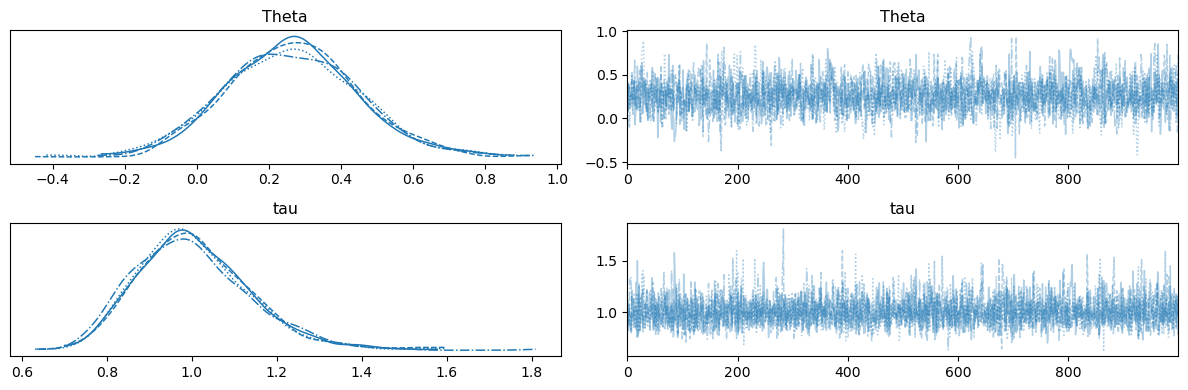

In [6]:
az.plot_trace(idata)
plt.tight_layout()

As observed, the tau histogram for each chain coincide with each other pretty well. However, for the theta histogram we see how there are differences at the mode for each chain. This is indicative of the different paths the chains take and their struggle for convergence (likely due to the dependent structure).

## 2.

In [7]:
priors_exponential = pymc.Model()
x = stats.norm(loc = 0, scale = 1).rvs(30)

with priors_exponential:
   
    lambd = 0.5
    #defining theta prior
    
    theta = pymc.Exponential('Theta', lam=lambd)
    
    #defining tau prior
    
    tau = pymc.Exponential("tau", lam=lambd)
    
    #defining likelihood function
    x_obs = pymc.Normal("x_obs", mu = theta, sigma=tau, observed=x)

In [8]:
np.random.seed(42)
m = 1000
with priors_exponential:
    # draw m posterior samples
    idata_1 = pymc.sample(draws=m, chains=4, tune=100)
    # arviz.InferenceData object
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Theta, tau]


Sampling 4 chains for 100 tune and 1_000 draw iterations (400 + 4_000 draws total) took 2 seconds.


In [9]:
az.summary(idata_1, round_to=5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Theta,0.08676,0.07720,0.00001,0.22650,0.00318,0.00225,507.98046,503.41781,1.00586
tau,0.96508,0.13112,0.72942,1.20269,0.00235,0.00170,3263.64394,2679.75793,1.00219


There is a 94% probability that the true value of theta falls between 0.00001 and 0.227. There is a 94% probability that the true value of tau falls between 0.72 and 1.20.

For theta, we can see that our exponential prior is a very bad prior. For one, our ess_bulk reduces to 507 from last time which is a major drop in independent samples produced. This hints at problems with convergence and a strong dependent structure. The high standard deviation and big high density interval points to the same problem. Essentially, for a 94% credible interval there is a bigger range of possible values theta can take which implies lesser accuracy.

For the tau chain, it still performs pretty well under an exponential prior. It's high density interval for a 94% credible interval is slighlty bigger than when it had a gamma prior and its ess_bulk is slighlty smaller but not a significant difference. 

the r_hat is 1 for both and less than 1.01 suggesting chain convergence again. However, the r_hat for theta is slightly higher which suggests that the chain isn't converging as well. 



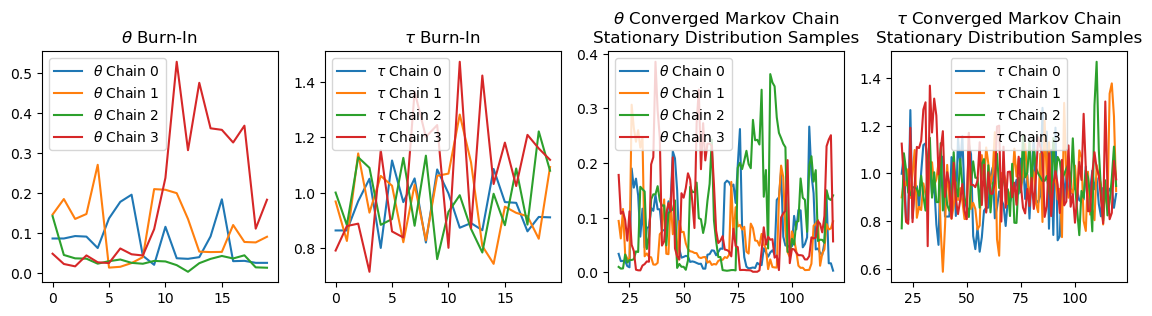

In [10]:
theta = idata_1.posterior['Theta'].values#.shape
tau = idata_1.posterior['tau'].values#.shape

fig,ax = plt.subplots(1, 4, figsize=(14,3));ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")

# pymc.sample(draws=1000, chains=2, tune=100)
# used 100 samples per chain to "tune" and these were
# automatically discarded so `burn` is likely not needed
burn = 20
demo = 120
C = 4
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();  

We can see that the theta chains oscillate far more, varying from each other much more relative to our tau chains. Our Tau chains seems to reach a stationary distribution more quickly, and coincide with each other pretty well.

## 3.

In [11]:
priors_beta_igamma = pymc.Model()
x = stats.norm(loc = 0, scale = 1).rvs(30)

with priors_beta_igamma:
   
    lambd = 0.5
    #defining theta prior
    
    theta = pymc.InverseGamma('Theta_inverse_gamma', alpha=2, beta=2)
    
    #defining tau prior
    
    tau = pymc.Beta("tau_beta", alpha=2, beta= 2)
    
    #defining likelihood function
    x_obs = pymc.Normal("x_obs", mu = theta, sigma=tau, observed=x)

In [12]:
np.random.seed(42)
m = 1000
with priors_beta_igamma:
    # draw m posterior samples
    idata_2 = pymc.sample(draws=m, chains=4, tune=100)
    # arviz.InferenceData object
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Theta_inverse_gamma, tau_beta]


Sampling 4 chains for 100 tune and 1_000 draw iterations (400 + 4_000 draws total) took 1 seconds.


In [13]:
az.summary(idata_2, round_to=5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Theta_inverse_gamma,0.28571,0.07236,0.15267,0.41174,0.00132,0.00094,3029.27880,2918.58019,1.00181
tau_beta,0.87793,0.06397,0.76675,0.98675,0.00199,0.00142,969.12201,982.65443,1.00399


there is a 94% probability that the true value of theta falls between 0.152 and 0.411. There is a 94% probability that the true value of tau falls between 0.767 and 0.99.


Here the tables have turned. An inverse gamma prior has led to a very high ess_bulk of 3029. This suggests that the inverse gamma prior is a good selection. Even the high density interval is the lowest of the other samplers. the r_hat is also at 1.001 which is low enough for us to conclude chain convergence. It is also lower than the r_hat of the previous exponential prior sampler. 

A beta density prior is not a good prior.It has an ess_bulk of 969 which is far lower than the previous samplers. One potential explanation is that the beta prior is not part of the exponential family like the exponential and gamma priors. Instead, it works well for when our likelihood is binomial. This struggle to converge also manifests in the r_hat which is 1.004 which is much higher than its previous r_hats. This is again an indication of poor exploration resulting from an incompatible prior. Interesting;y the ess_tail is higher suggesting that the prior better explores extreme points. 



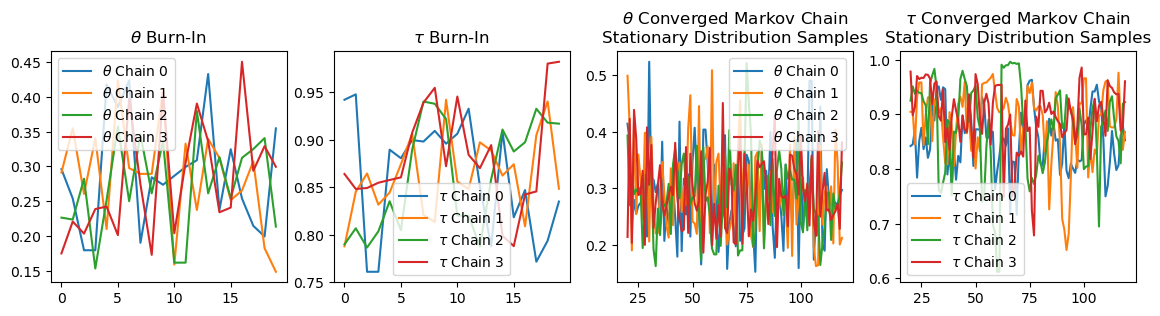

In [14]:
theta = idata_2.posterior['Theta_inverse_gamma'].values#.shape
tau = idata_2.posterior['tau_beta'].values#.shape

fig,ax = plt.subplots(1, 4, figsize=(14,3));ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")

# pymc.sample(draws=1000, chains=2, tune=100)
# used 100 samples per chain to "tune" and these were
# automatically discarded so `burn` is likely not needed
burn = 20
demo = 120
C = 4
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();  

We can see how Tau struggles to converge. Chain 2 especially seems to jump around before stabilizing. Each of the 4 chains also maintain a distance from each other at certain iterations with poor convergence at the end.

Theta on the other hand has chains that are less divergent. They more or less intersect each other converging at a value.

# Q3

In [15]:
def slice_f_at_y(f, x, y, x_grid=np.linspace(0,1,51)):
    
    # find interval of grid points where f(x_grid) > y 
    # then extend the enterval so endpoints f(a)<y and f(b)<y 
    x_grid_delta = x_grid[1]-x_grid[0]
    a,b = x_grid[f(x_grid)>y][[0,-1]]+[-x_grid_delta,x_grid_delta]
    # a,b = x_grid[0,-1]  # make the interval all of x_grid
    
    x_ = a + stats.uniform().rvs()*(b-a)    
    if f(x_)>y:
        return x_,1  # in 1 try if f(x_)>y and "x_ is under f" 
    elif x_ < x:  # or if "x_ was above f on the left side of the interval" 
        x_l,x_r = x_,b
    else:
        x_l,x_r = a,x_  # or if "x_ was above f on the right side of the interval"
    return slice_f_at_y_(f, x, y, x_l, x_r, tot = 2)  # try again with a reduced interval

def slice_f_at_y_(f, x, y, x_l=0, x_r=1, tot=1):
    
    x_ = x_l + stats.uniform().rvs()*(x_r-x_l)
    
    if f(x_)>y:
        return x_,tot
    elif x_ < x:
        x_l = x_
    else:
        x_r = x_
    return slice_f_at_y_(f, x, y, x_l, x_r, tot = tot+1)


**Slice sampling method**

Slice sampling works as follows. First, we pick an initial value x_0. Then, we sample a value 'y' which acts like a threshold from a uniform distribution from [0,f(x_0)] where f(x) is the density function of our target distribution. This is equivalent to determining our vertical slice. Then, we create a horizontal slice which is nothing but an interval [L,R]  (right and left bound of the interval) such that f(x) > y for all x in the interval. 

Then, we sample a new x from the interval [L,R]. After doing so, the process is repeated for a specific number of steps. This will eventually simulate the target distribution.


**Slice sampling coding execution**

This process is executed in the code. As we can see, we first initialize an x grid where we then find our horizontal interval [a,b] based on the input for our initial value 'x' and 'y' in the condition f(x) > y. After having sampled the initial value, a new sample is proposed  x_ which is again drawn from the uniform probability distribution within the interval [a,b]. There are two cases considered, one where x_ is below x and one where x_ is above x. In these cases where the new x is outside the slice, the interval is shrinked to either [x,b] or [a,x] respectively. The process is then repeated recursively as the function is called back on the new interval.

**Comparing Metropolis hastings to Slice sampling**

Metropolis-Hastings (MH) draws samples from a proposal distribution and either accepts or rejects each proposal based on an acceptance probability, which depends on how likely the proposed value is in the target distribution relative to the current value. The key idea is that if the proposal distribution is well-matched to the target distribution, the acceptance rate will be high, allowing the chain to efficiently approximate the target distribution over time.

Slice sampling, in contrast, directly uses the target density to define a sampling region, rather than relying on a proposal distribution. The fundamental requirement is the ability to evaluate the unnormalized target density f(x). Instead of proposing a new sample from a separate proposal distribution (as in MH), slice sampling defines a slice region—an interval over which the target density exceeds a randomly chosen threshold—and then samples uniformly from this region. The process dynamically adjusts the slice width to explore the target distribution effectively.


If we were to replace the MH algorithm. Firstly, our target distribution is our full conditional for tau and theta. Instead of sampling directly from the distribution, we are sampling uniformly from the region beneath the curve in slice sampling. As explained above, to draw the sample instead of randomly drawing from a proposal distribution we are randomly selecting a threshold 'y' between [0,f(x)] where x is out initial value and then finding an interval [L,R] based on the condition f(x)>y. We then randomly sample from this interval and repeat the process again (calculating threshold etc). If our new x is rejected we shrink the interval until its valid. This valid x becomes our value for the gibbs sampler. 








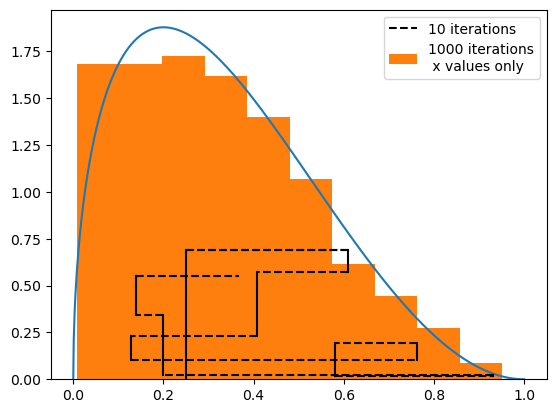

In [16]:
x_grid = np.linspace(0,1,1000)
f = lambda x: stats.beta(1.5,3).pdf(x)
plt.plot(x_grid, f(x_grid))
    
m = 1000
x = np.zeros([m+1,3])
x[:2,0] = 0.25

plot_trace = 10
for t in range(1,m):
    
    x[t,1] = stats.uniform().rvs()*f(x[t,0])
    if t < plot_trace:
        plt.plot([x[t,0]]*2, [x[t-1,1],x[t,1]], 'k')
    
    x[t+1,0],x[t+1,2] = slice_f_at_y(f, x[t,0], x[t,1])
    if t < plot_trace:
        if t==1:
            plt.plot([x[t,0], x[t+1,0]], [x[t,1]]*2, 'k--', label=str(plot_trace)+ " iterations")
        plt.plot([x[t,0], x[t+1,0]], [x[t,1]]*2, 'k--')
    
plt.hist(x[:,0], density=True, label=str(m)+" iterations\n x values only")
plt.legend();